In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Leitura do arquivo csv

In [33]:
base_credit = pd.read_csv('../databases/credit_data.csv')

### Primeiras cinco células e cinco últimas

In [34]:
base_credit.head(5)

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [35]:
base_credit.tail(5)

,i#clientid,income,age,loan,c#default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [36]:
df_credit = base_credit

### Visualização dos dados

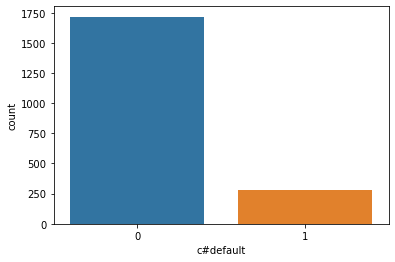

In [40]:
sns.countplot(x = df_credit['c#default']);

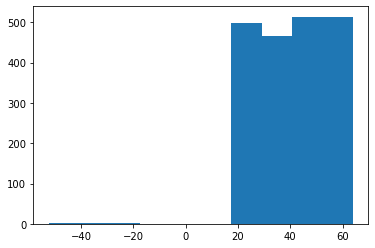

In [38]:
plt.hist(x = df_credit['age']);

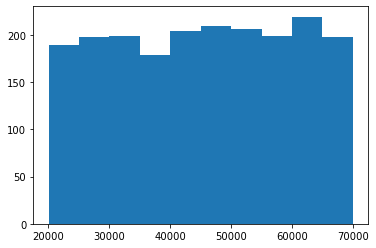

In [39]:
plt.hist(x = df_credit['income']);

### Pré-processamento

In [41]:
df_credit.describe()

,i#clientid,income,age,loan,c#default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


### Tratamento de valores inconsistentes:

Iremos considerar que pessoas com menos de 0 anos são erros no banco de dados, e a opção para tratamento foi o de remoção
das linhas

In [42]:
df_credit.loc[df_credit["age"] < 0]

,i#clientid,income,age,loan,c#default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [44]:
df_credit = df_credit.drop(df_credit[df_credit["age"] < 0].index)
df_credit

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


### Valores faltantes: 

Este dataframe não veio com valores nulos, por isso não é necessário tratar

In [45]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  1997 non-null   int64  
 1   income      1997 non-null   float64
 2   age         1994 non-null   float64
 3   loan        1997 non-null   float64
 4   c#default   1997 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 93.6 KB


In [46]:
df_credit.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [59]:
df_credit['age'].fillna(base_credit['age'].mean(), inplace = True)
df_credit.isnull().sum()

i#clientid    0
income        0
age           0
loan          0
c#default     0
dtype: int64

### Divisão dos valores dos previsores e da classe

In [60]:
previsores = df_credit.iloc[:, 1:4].values
classe = df_credit.iloc[:,4].values

### Padronização dos valores

Algumas colunas possuem valores pequenos em relação as outras colunas, por isso temos que tratar por padronizar os valores

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

### Separação das bases de treino e de teste

In [62]:
from sklearn.model_selection import train_test_split

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

### Salvar as variáveis que foram realizados os pré processos

In [63]:
import pickle

In [64]:
with open('../variaveis_preprocessadas/credit.pkl', mode = 'wb') as f:
  pickle.dump([previsores_treinamento, classe_treinamento, previsores_teste, classe_teste], f)